## Projeto

Objetivo: Armazenar os gastos (até o momento) por deputado federal.

1. Obter os dados
2. Efetuar os ajustes necessários
3. Armazenar no sqlite

In [1]:
import pandas as pd
import requests

In [2]:
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [3]:
deputados = pd.DataFrame(resultado.json()['dados'])

In [4]:
deputados.head()

,email,id,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,dep.abiliosantana@camara.leg.br,204554,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,dep.abouanni@camara.leg.br,204521,56,ABOU ANNI,PSL,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,dep.acaciofavacho@camara.leg.br,204379,56,ACÁCIO FAVACHO,PROS,AP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,dep.adolfoviana@camara.leg.br,204560,56,ADOLFO VIANA,PSDB,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,dep.adrianaventura@camara.leg.br,204528,56,ADRIANA VENTURA,NOVO,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [6]:
deputados.shape

(513, 9)

In [7]:
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/"
    url_despesa = url_despesa + "deputados/"+str(id)+"/despesas?ordem=ASC&ano=2019"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [8]:
len(gastos)

513

In [9]:
len(gastos[0])

15

In [24]:
gastos[0]

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,dataDocumento,mes,nomeFornecedor,numDocumento,numRessarcimento,parcela,tipoDespesa,tipoDocumento,urlDocumento,valorDocumento,valorGlosa,valorLiquido,id
0,2019,15139629000194,6801547,1582602,0,2019-03-14,3,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,154.95,0.00,154.95,204554
1,2019,15139629000194,6839323,1599179,0,2019-05-13,5,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,343.48,7.68,335.80,204554
2,2019,15139629000194,6864448,1609919,0,2019-06-11,6,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,312.27,7.01,305.26,204554
3,2019,06540941528,6776189,1572529,1,2019-02-26,2,MATHEUS QUADROS LOIOLA MARTINS,637,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00,204554
4,2019,06540941528,6844259,1601230,1,2019-05-30,5,MATHEUS QUADROS LOIOLA MARTINS,s/n,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00,204554
5,2019,06540941528,6864424,1609920,1,2019-06-30,6,MATHEUS QUADROS LOIOLA MARTINS,s/n,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00,204554
6,2019,06540941528,6802409,1583031,1,2019-03-30,3,MATHEUS QUADROS LOIOLA MARTINS,SEM NUMERO,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00,204554
7,2019,06540941528,6816701,1588825,1,2019-04-26,4,MATHEUS QUADROS LOIOLA MARTINS,SEM NUMERO,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00,204554
8,2019,40575110000104,6778961,1573645,0,2019-03-01,3,MICRO & SOFT INFORMATICA LTDA,00002831,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,560.00,0.00,560.00,204554
9,2019,40575110000104,6816726,1588825,0,2019-04-01,4,MICRO & SOFT INFORMATICA LTDA,00002865,,0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,560.00,0.00,560.00,204554


### Transformação 

In [25]:
total = pd.concat(gastos)

In [29]:
# valores ausentes?
total.isnull().sum()

ano                    0
cnpjCpfFornecedor      0
codDocumento           0
codLote                0
codTipoDocumento       0
dataDocumento        158
id                     0
mes                    0
nomeFornecedor         0
numDocumento           0
numRessarcimento       0
parcela                0
tipoDespesa            0
tipoDocumento          0
urlDocumento           0
valorDocumento         0
valorGlosa             0
valorLiquido           0
dtype: int64

In [30]:
del total['dataDocumento']

In [31]:
total.head()

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,numRessarcimento,parcela,tipoDespesa,tipoDocumento,urlDocumento,valorDocumento,valorGlosa,valorLiquido
0,2019.0,15139629000194,6801547.0,1582602.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,154.95,0.00,154.95
1,2019.0,15139629000194,6839323.0,1599179.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,343.48,7.68,335.80
2,2019.0,15139629000194,6864448.0,1609919.0,0.0,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,312.27,7.01,305.26
3,2019.0,06540941528,6776189.0,1572529.0,1.0,204554,2.0,MATHEUS QUADROS LOIOLA MARTINS,637,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00
4,2019.0,06540941528,6844259.0,1601230.0,1.0,204554,5.0,MATHEUS QUADROS LOIOLA MARTINS,s/n,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00


In [32]:
total.numRessarcimento.value_counts()

     6799
0     851
Name: numRessarcimento, dtype: int64

In [33]:
total.shape

(7650, 17)

In [34]:
del total['numRessarcimento']

In [35]:
total.head()

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,parcela,tipoDespesa,tipoDocumento,urlDocumento,valorDocumento,valorGlosa,valorLiquido
0,2019.0,15139629000194,6801547.0,1582602.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,154.95,0.00,154.95
1,2019.0,15139629000194,6839323.0,1599179.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,343.48,7.68,335.80
2,2019.0,15139629000194,6864448.0,1609919.0,0.0,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,,312.27,7.01,305.26
3,2019.0,06540941528,6776189.0,1572529.0,1.0,204554,2.0,MATHEUS QUADROS LOIOLA MARTINS,637,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00
4,2019.0,06540941528,6844259.0,1601230.0,1.0,204554,5.0,MATHEUS QUADROS LOIOLA MARTINS,s/n,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,,1500.00,0.00,1500.00


In [36]:
total.urlDocumento.value_counts()

    7650
Name: urlDocumento, dtype: int64

In [37]:
del total['urlDocumento']

In [38]:
total.head()

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,parcela,tipoDespesa,tipoDocumento,valorDocumento,valorGlosa,valorLiquido
0,2019.0,15139629000194,6801547.0,1582602.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,154.95,0.00,154.95
1,2019.0,15139629000194,6839323.0,1599179.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,343.48,7.68,335.80
2,2019.0,15139629000194,6864448.0,1609919.0,0.0,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,312.27,7.01,305.26
3,2019.0,06540941528,6776189.0,1572529.0,1.0,204554,2.0,MATHEUS QUADROS LOIOLA MARTINS,637,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,1500.00,0.00,1500.00
4,2019.0,06540941528,6844259.0,1601230.0,1.0,204554,5.0,MATHEUS QUADROS LOIOLA MARTINS,s/n,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,1500.00,0.00,1500.00


In [39]:
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7650, 15)
(7650, 15)


In [40]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7650 entries, 0 to 14
Data columns (total 15 columns):
ano                  7650 non-null float64
cnpjCpfFornecedor    7650 non-null object
codDocumento         7650 non-null float64
codLote              7650 non-null float64
codTipoDocumento     7650 non-null float64
id                   7650 non-null int64
mes                  7650 non-null float64
nomeFornecedor       7650 non-null object
numDocumento         7650 non-null object
parcela              7650 non-null float64
tipoDespesa          7650 non-null object
tipoDocumento        7650 non-null object
valorDocumento       7650 non-null float64
valorGlosa           7650 non-null float64
valorLiquido         7650 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 956.2+ KB


In [41]:
total.describe()

,ano,codDocumento,codLote,codTipoDocumento,id,mes,parcela,valorDocumento,valorGlosa,valorLiquido
count,7650.0,7.650000e+03,7.650000e+03,7650.000000,7650.000000,7650.000000,7650.0,7650.000000,7650.000000,7650.000000
mean,2019.0,6.106642e+06,1.406658e+06,1.562484,167002.590196,2.884837,0.0,1118.353442,20.606558,1097.081618
std,0.0,1.979567e+06,4.980500e+05,1.789725,45869.756154,2.117219,0.0,3285.220808,988.343863,2809.974085
min,2019.0,0.000000e+00,0.000000e+00,0.000000,66179.000000,1.000000,0.0,-1881.890000,0.000000,-1881.890000
25%,2019.0,6.747080e+06,1.558258e+06,0.000000,141553.000000,1.000000,0.0,126.012500,0.000000,123.325000
50%,2019.0,6.780194e+06,1.574431e+06,1.000000,178955.000000,2.000000,0.0,246.770000,0.000000,243.665000
75%,2019.0,6.834911e+06,1.596957e+06,4.000000,204452.000000,5.000000,0.0,850.015000,0.000000,826.177500
max,2019.0,6.894454e+06,1.622482e+06,4.000000,209189.000000,8.000000,0.0,172000.000000,86000.000000,86000.000000


In [43]:
total.nomeFornecedor.value_counts()

CELULAR FUNCIONAL                                               281
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                          225
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                    184
Cia Aérea - GOL                                                 159
RAMAL                                                           158
AUTO POSTO AEROPORTO LTDA                                       135
AMORETTO CAFES EXPRESSO LTDA                                    130
Lucas Paulino de Sousa Nogueira                                 111
Kalunga Comercio e Industria Grafica Ltda                        79
CLARO S.A.                                                       79
CEMIG DISTRIBUIÇÃO S.A.                                          70
Cia Aérea - TAM                                                  58
PLENA INFORMATICA LTDA EPP                                       51
CONDE & DELL ARINGA - DES DE SOFTWARES                           51
CELESC DISTRIBUICAO S.A                         

In [48]:
total.nomeFornecedor = [str(fornecedor).upper().replace("S.A.", "S.A").replace("S/A", "S.A") \
 for fornecedor in total.nomeFornecedor]

In [50]:
total.nomeFornecedor.value_counts()

CELULAR FUNCIONAL                                               281
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                          225
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                    184
CLARO S.A                                                       161
CIA AÉREA - GOL                                                 159
RAMAL                                                           158
AUTO POSTO AEROPORTO LTDA                                       135
AMORETTO CAFES EXPRESSO LTDA                                    130
LUCAS PAULINO DE SOUSA NOGUEIRA                                 117
KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA                        92
CEMIG DISTRIBUIÇÃO S.A                                           70
CIA AÉREA - TAM                                                  58
CONDE & DELL ARINGA - DES DE SOFTWARES                           51
PLENA INFORMATICA LTDA EPP                                       51
CELESC DISTRIBUICAO S.A                         

### Carga

In [51]:
from sqlalchemy import create_engine

In [53]:
engine = create_engine('sqlite:///dados_abertos.db')

In [54]:
deputados.to_sql('deputados', engine)

In [55]:
total.to_sql('despesas_total', engine)

### Análise

In [56]:
total = pd.read_sql("select * from despesas_total;", engine)

In [57]:
total.head()

,index,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,parcela,tipoDespesa,tipoDocumento,valorDocumento,valorGlosa,valorLiquido
0,0,2019.0,15139629000194,6801547.0,1582602.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,154.95,0.00,154.95
1,1,2019.0,15139629000194,6839323.0,1599179.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,343.48,7.68,335.80
2,2,2019.0,15139629000194,6864448.0,1609919.0,0.0,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,312.27,7.01,305.26
3,3,2019.0,06540941528,6776189.0,1572529.0,1.0,204554,2.0,MATHEUS QUADROS LOIOLA MARTINS,637,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,1500.00,0.00,1500.00
4,4,2019.0,06540941528,6844259.0,1601230.0,1.0,204554,5.0,MATHEUS QUADROS LOIOLA MARTINS,s/n,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,1500.00,0.00,1500.00


In [58]:
deputados = pd.read_sql("select * from deputados", engine)

In [59]:
deputados.head()

,index,email,id,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,0,dep.abiliosantana@camara.leg.br,204554,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,1,dep.abouanni@camara.leg.br,204521,56,ABOU ANNI,PSL,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,2,dep.acaciofavacho@camara.leg.br,204379,56,ACÁCIO FAVACHO,PROS,AP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,3,dep.adolfoviana@camara.leg.br,204560,56,ADOLFO VIANA,PSDB,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,4,dep.adrianaventura@camara.leg.br,204528,56,ADRIANA VENTURA,NOVO,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [60]:
total = total.merge(deputados, on=['id'])

In [61]:
total.head()

,index_x,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,...,valorLiquido,index_y,email,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,0,2019.0,15139629000194,6801547.0,1582602.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,355732875,...,154.95,0,dep.abiliosantana@camara.leg.br,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,1,2019.0,15139629000194,6839323.0,1599179.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,368080247,...,335.80,0,dep.abiliosantana@camara.leg.br,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,2,2019.0,15139629000194,6864448.0,1609919.0,0.0,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,374258346,...,305.26,0,dep.abiliosantana@camara.leg.br,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,3,2019.0,06540941528,6776189.0,1572529.0,1.0,204554,2.0,MATHEUS QUADROS LOIOLA MARTINS,637,...,1500.00,0,dep.abiliosantana@camara.leg.br,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,4,2019.0,06540941528,6844259.0,1601230.0,1.0,204554,5.0,MATHEUS QUADROS LOIOLA MARTINS,s/n,...,1500.00,0,dep.abiliosantana@camara.leg.br,56,ABÍLIO SANTANA,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [63]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [65]:
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)

In [66]:
gastos_deputados.head(10)

,valorDocumento,valorLiquido
nome,,
NIVALDO ALBUQUERQUE,224842.95,224842.95
PROFESSORA MARCIVANIA,184939.82,98939.82
GUSTINHO RIBEIRO,166866.21,166866.21
PROFESSOR ALCIDES,136200.78,136200.19
ALINE GURGEL,121016.08,120996.18
SÂMIA BOMFIM,68158.50,68158.50
SILAS CÂMARA,66751.79,66751.79
JOÃO CARLOS BACELAR,66275.85,64991.53
CARLOS BEZERRA,66131.12,66131.12


In [67]:
gastos_deputados.tail(10)

,valorDocumento,valorLiquido
nome,,
ROBÉRIO MONTEIRO,2182.16,2182.16
TIAGO MITRAUD,2176.85,2147.35
ALEXANDRE PADILHA,2156.80,2156.80
AIRTON FALEIRO,2113.55,1893.36
PROFESSORA DAYANE PIMENTEL,1990.56,1952.79
CHRISTIANE DE SOUZA YARED,1965.45,1916.78
PEDRO LUCAS FERNANDES,1938.76,1938.76
MARRECA FILHO,1603.81,1557.92
RODRIGO AGOSTINHO,1572.29,1555.72


In [69]:
%matplotlib inline

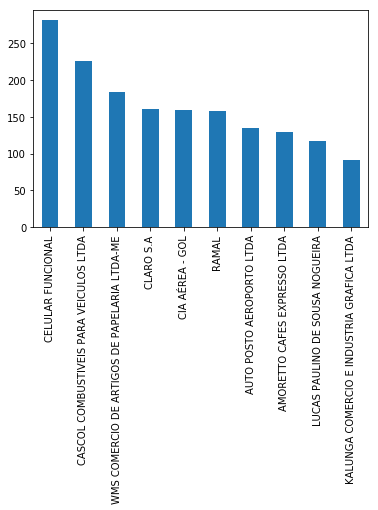

In [72]:
total.nomeFornecedor.value_counts()[:10].plot(kind="bar")